In [1]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Group_8_data_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,0,298.1,308.6,1551,42.8,0,0,0,1,0
1,1,298.2,308.7,1408,46.3,3,0,1,0,0
2,2,298.1,308.5,1498,49.4,5,0,1,0,0
3,3,298.2,308.6,1433,39.5,7,0,1,0,0
4,4,298.2,308.7,1408,40.0,9,0,1,0,0


In [4]:
X=df[[ 'air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear',
       'Type_H', 'Type_L', 'Type_M']]
y=df['failure']

In [5]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  stratify=y,test_size=0.2, random_state=42)

# X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)

In [6]:
# from imblearn.over_sampling import SMOTE
# X_train, y_train = SMOTE().fit_resample(X_train1,y_train1)

In [7]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

# X_valid_scaled = scaler.transform(X_valid)

In [8]:
# scaler = MinMaxScaler()

# scaler.fit(X)
# X= scaler.transform(X)

# scaler.fit(df[['Spending Score']])
# df['Spending Score'] = scaler.transform(df[['Spending Score']])

In [9]:
X

array([[0.30434783, 0.35802469, 0.22293364, ..., 0.        , 0.        ,
        1.        ],
       [0.31521739, 0.37037037, 0.13969732, ..., 0.        , 1.        ,
        0.        ],
       [0.30434783, 0.34567901, 0.19208382, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.40217391, 0.35802469, 0.27764843, ..., 0.        , 0.        ,
        1.        ],
       [0.40217391, 0.37037037, 0.13969732, ..., 1.        , 0.        ,
        0.        ],
       [0.40217391, 0.37037037, 0.19324796, ..., 0.        , 0.        ,
        1.        ]])

In [10]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

In [11]:
cluster = km.predict(X)
cluster

array([1, 0, 0, ..., 1, 1, 1])

In [12]:
df['Cluster'] = cluster
df

,Unnamed: 0,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure,Cluster
0,0,298.1,308.6,1551,42.8,0,0,0,1,0,1
1,1,298.2,308.7,1408,46.3,3,0,1,0,0,0
2,2,298.1,308.5,1498,49.4,5,0,1,0,0,0
3,3,298.2,308.6,1433,39.5,7,0,1,0,0,0
4,4,298.2,308.7,1408,40.0,9,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,298.8,308.4,1604,29.5,14,0,0,1,0,1
9996,9996,298.9,308.4,1632,31.8,17,1,0,0,0,1
9997,9997,299.0,308.6,1645,33.4,22,0,0,1,0,1
9998,9998,299.0,308.7,1408,48.5,25,1,0,0,0,1


In [13]:
km.labels_

array([1, 0, 0, ..., 1, 1, 1])

In [14]:
km.cluster_centers_

array([[ 5.12590580e-01,  5.32382716e-01,  2.16221867e-01,
         4.97206044e-01,  4.28374835e-01,  3.19189120e-16,
         1.00000000e+00, -1.16573418e-15],
       [ 5.09627717e-01,  5.30302469e-01,  2.15213329e-01,
         4.96873283e-01,  4.24147233e-01,  2.50750000e-01,
         1.11022302e-16,  7.49250000e-01]])

In [15]:
km.inertia_

3240.4244554703573

In [16]:
km.score(X)

-3240.4244554703578

In [17]:
km.transform(X)

# measures the distance from each instance to every centroid
# this can be used as a transformation from a high dimensional space to a lower dimensional space

array([[1.50293004, 0.615662  ],
       [0.50203953, 1.36779561],
       [0.51230263, 1.37160812],
       ...,
       [1.47347986, 0.54103905],
       [1.47192032, 1.13364068],
       [1.46114684, 0.50669626]])

In [18]:
silhouette_samples(X, km.labels_)

array([0.45554528, 0.60749656, 0.60275294, ..., 0.48164572, 0.16340641,
       0.49663458])

In [19]:
silhouette_score(X, km.labels_)

0.5464679160074033

In [20]:
inertia = []

for k in range(1,18):
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)

In [21]:
inertia

[7138.704211014679,
 3240.4244554703578,
 1737.0911098427869,
 1415.3198724757037,
 1237.6194593766836,
 1072.347237552295,
 962.4913303973726,
 878.6878591128456,
 823.5313158507344,
 785.2822988369901,
 730.4038242295145,
 701.361341048131,
 675.4768818919232,
 645.6228454878986,
 628.2807510888541,
 607.9364210841989,
 588.0599813010596]

Text(0.5, 1.0, 'The Elbow title')

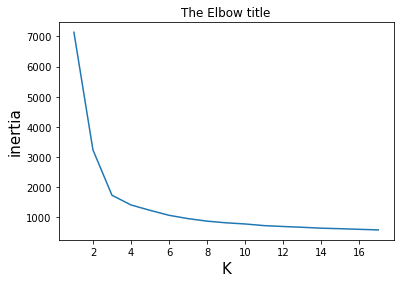

In [22]:
plt.plot(range(1,18), inertia)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);
plt.title('The Elbow title')


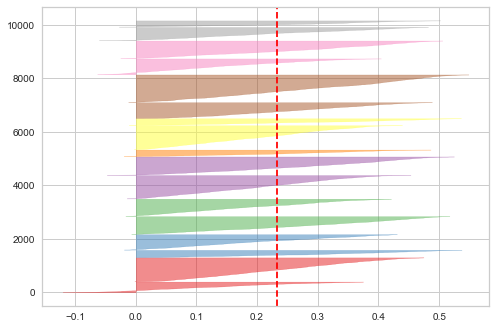

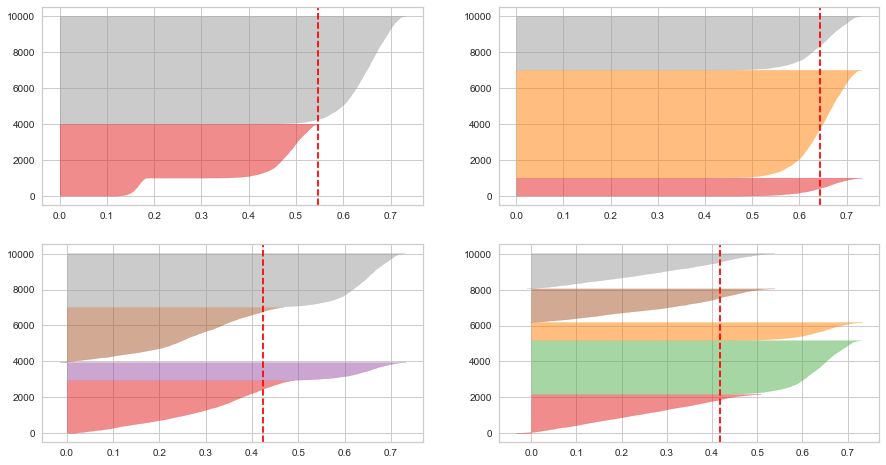

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X);
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(2,6):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(X)

Text(0, 0.5, 'Silhouette Score')

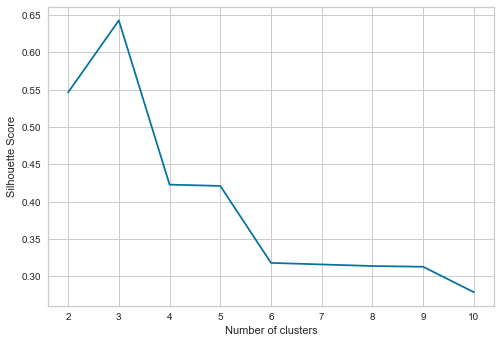

In [24]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    sil.append(silhouette_score(X, kmeans.labels_, metric = 'euclidean'))
plt.plot(range(2,11),sil)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')